In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [3]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 27)           837         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 27)           108         dense_1[0][0]                    
_____________________________________________________________________________________

426472/426472 [==============================] - 21s 50us/step - loss: 15.1897 - rec_loss: 24.5846 - kl_loss: 4.4157 - val_loss: 13.6175 - val_rec_loss: 24.0639 - val_kl_loss: 2.5742
Epoch 17/150
426472/426472 [==============================] - 21s 50us/step - loss: 15.1489 - rec_loss: 24.5312 - kl_loss: 4.4094 - val_loss: 13.5091 - val_rec_loss: 23.7276 - val_kl_loss: 2.6809
Epoch 18/150
426472/426472 [==============================] - 21s 50us/step - loss: 15.0730 - rec_loss: 24.4056 - kl_loss: 4.4034 - val_loss: 13.6361 - val_rec_loss: 24.0337 - val_kl_loss: 2.6638
Epoch 19/150
426472/426472 [==============================] - 21s 50us/step - loss: 15.0854 - rec_loss: 24.4149 - kl_loss: 4.4275 - val_loss: 13.4989 - val_rec_loss: 23.8279 - val_kl_loss: 2.5870
Epoch 20/150
426472/426472 [==============================] - 21s 50us/step - loss: 14.9926 - rec_loss: 24.2449 - kl_loss: 4.4214 - val_loss: 13.3447 - val_rec_loss: 23.4331 - val_kl_loss: 2.6792
Epoch 21/150
426472/426472 [=====

Epoch 58/150
426472/426472 [==============================] - 21s 50us/step - loss: 14.2796 - rec_loss: 22.6142 - kl_loss: 4.6290 - val_loss: 12.9230 - val_rec_loss: 22.2515 - val_kl_loss: 2.9728
Epoch 59/150
426472/426472 [==============================] - 21s 50us/step - loss: 14.2509 - rec_loss: 22.5721 - kl_loss: 4.6235 - val_loss: 13.1072 - val_rec_loss: 22.6461 - val_kl_loss: 2.9562
Epoch 60/150
426472/426472 [==============================] - 21s 50us/step - loss: 14.5854 - rec_loss: 23.2502 - kl_loss: 4.6352 - val_loss: 12.9016 - val_rec_loss: 22.3175 - val_kl_loss: 2.8603
Epoch 61/150
426472/426472 [==============================] - 21s 50us/step - loss: 14.3763 - rec_loss: 22.8125 - kl_loss: 4.6408 - val_loss: 13.2231 - val_rec_loss: 22.9742 - val_kl_loss: 2.8552
Epoch 62/150
426472/426472 [==============================] - 21s 50us/step - loss: 14.2348 - rec_loss: 22.5535 - kl_loss: 4.6310 - val_loss: 13.1427 - val_rec_loss: 22.6988 - val_kl_loss: 2.9773
Epoch 63/150
426472/

Epoch 100/150
426472/426472 [==============================] - 22s 51us/step - loss: 14.1981 - rec_loss: 22.4500 - kl_loss: 4.7364 - val_loss: 13.2173 - val_rec_loss: 22.8300 - val_kl_loss: 3.0104
Epoch 101/150
426472/426472 [==============================] - 22s 51us/step - loss: 14.0731 - rec_loss: 22.2232 - kl_loss: 4.7141 - val_loss: 12.9589 - val_rec_loss: 22.3320 - val_kl_loss: 2.9868
Epoch 102/150
426472/426472 [==============================] - 22s 51us/step - loss: 14.0085 - rec_loss: 22.1132 - kl_loss: 4.6993 - val_loss: 13.3617 - val_rec_loss: 23.0561 - val_kl_loss: 3.0731
Epoch 103/150
426472/426472 [==============================] - 22s 52us/step - loss: 13.9256 - rec_loss: 21.9509 - kl_loss: 4.7064 - val_loss: 13.0139 - val_rec_loss: 22.4624 - val_kl_loss: 2.9842
Epoch 104/150
426472/426472 [==============================] - 22s 51us/step - loss: 13.8864 - rec_loss: 21.8814 - kl_loss: 4.7029 - val_loss: 12.8379 - val_rec_loss: 22.1684 - val_kl_loss: 2.9287
Epoch 105/150
4

426472/426472 [==============================] - 24s 56us/step - loss: 13.6476 - rec_loss: 21.4412 - kl_loss: 4.6954 - val_loss: 12.8119 - val_rec_loss: 22.1220 - val_kl_loss: 2.9371
Epoch 142/150
426472/426472 [==============================] - 21s 49us/step - loss: 13.7205 - rec_loss: 21.5737 - kl_loss: 4.7102 - val_loss: 13.2392 - val_rec_loss: 22.8230 - val_kl_loss: 3.0913
Epoch 143/150
426472/426472 [==============================] - 21s 49us/step - loss: 13.6753 - rec_loss: 21.4991 - kl_loss: 4.6982 - val_loss: 13.2596 - val_rec_loss: 22.8991 - val_kl_loss: 3.0449
Epoch 144/150
426472/426472 [==============================] - 21s 49us/step - loss: 13.6899 - rec_loss: 21.5077 - kl_loss: 4.7134 - val_loss: 13.1337 - val_rec_loss: 22.7463 - val_kl_loss: 2.9549
Epoch 145/150
426472/426472 [==============================] - 21s 49us/step - loss: 13.6804 - rec_loss: 21.5120 - kl_loss: 4.6936 - val_loss: 13.2104 - val_rec_loss: 22.6849 - val_kl_loss: 3.1633
Epoch 146/150
426472/426472 [

Epoch 42/50
426472/426472 [==============================] - 72s 170us/step - loss: 0.1635 - accuracy: 0.9372 - val_loss: 0.1156 - val_accuracy: 0.9762
Epoch 43/50
426472/426472 [==============================] - 73s 171us/step - loss: 0.1637 - accuracy: 0.9372 - val_loss: 0.1204 - val_accuracy: 0.9756
Epoch 44/50
426472/426472 [==============================] - 73s 171us/step - loss: 0.1637 - accuracy: 0.9371 - val_loss: 0.1174 - val_accuracy: 0.9751
Epoch 45/50
426472/426472 [==============================] - 73s 172us/step - loss: 0.1635 - accuracy: 0.9373 - val_loss: 0.1118 - val_accuracy: 0.9778
Epoch 46/50
426472/426472 [==============================] - 73s 171us/step - loss: 0.1636 - accuracy: 0.9371 - val_loss: 0.1123 - val_accuracy: 0.9745
Epoch 47/50
426472/426472 [==============================] - 73s 171us/step - loss: 0.1634 - accuracy: 0.9375 - val_loss: 0.1163 - val_accuracy: 0.9751
Epoch 48/50
426472/426472 [==============================] - 73s 171us/step - loss: 0.16

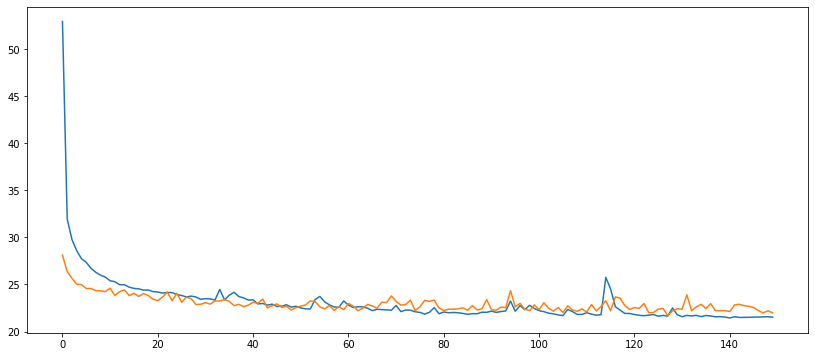

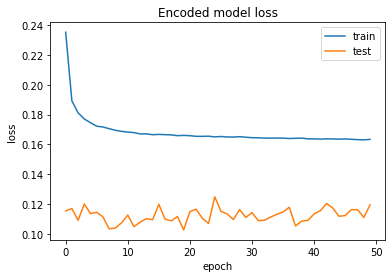

Overall accuracy of Convolutional Neural Network model: 0.9760961770736777


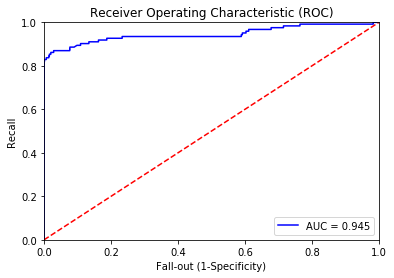

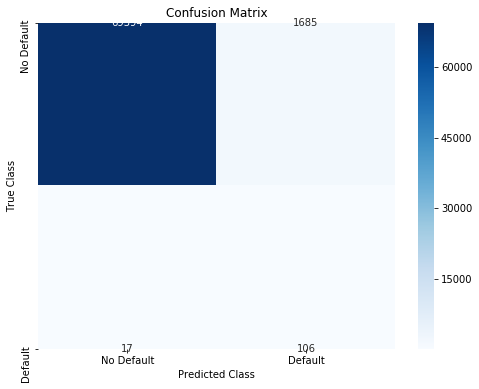

AUC(ROC): 0.9190413003188825
Precision: 0.05918481295365718
Recall: 0.8617886178861789
F1 score: 0.11076280041797285
False positives: 1685
True positives: 106
False negatives: 17
True negatives: 69394
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 27)           837         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 27)           108         dense_10[0][0]                   
_____________________________________________________________________________________

426472/426472 [==============================] - 21s 48us/step - loss: 14.8703 - rec_loss: 23.6312 - kl_loss: 4.5025 - val_loss: 13.5998 - val_rec_loss: 23.7630 - val_kl_loss: 2.8098
Epoch 17/150
426472/426472 [==============================] - 21s 48us/step - loss: 14.8317 - rec_loss: 23.5820 - kl_loss: 4.5086 - val_loss: 13.2652 - val_rec_loss: 23.1540 - val_kl_loss: 2.7696
Epoch 18/150
426472/426472 [==============================] - 21s 48us/step - loss: 14.7496 - rec_loss: 23.4521 - kl_loss: 4.5095 - val_loss: 13.5865 - val_rec_loss: 23.7212 - val_kl_loss: 2.8473
Epoch 19/150
426472/426472 [==============================] - 21s 48us/step - loss: 14.7092 - rec_loss: 23.3773 - kl_loss: 4.5189 - val_loss: 13.4512 - val_rec_loss: 23.4204 - val_kl_loss: 2.9002
Epoch 20/150
426472/426472 [==============================] - 21s 48us/step - loss: 14.6854 - rec_loss: 23.3545 - kl_loss: 4.5244 - val_loss: 13.2894 - val_rec_loss: 23.0953 - val_kl_loss: 2.9044
Epoch 21/150
426472/426472 [=====

Epoch 58/150
426472/426472 [==============================] - 21s 49us/step - loss: 13.8958 - rec_loss: 21.9165 - kl_loss: 4.5545 - val_loss: 13.4490 - val_rec_loss: 23.5968 - val_kl_loss: 2.7866
Epoch 59/150
426472/426472 [==============================] - 21s 49us/step - loss: 13.9251 - rec_loss: 21.9732 - kl_loss: 4.5565 - val_loss: 12.9556 - val_rec_loss: 22.5527 - val_kl_loss: 2.8600
Epoch 60/150
426472/426472 [==============================] - 21s 49us/step - loss: 13.8301 - rec_loss: 21.7786 - kl_loss: 4.5707 - val_loss: 12.9497 - val_rec_loss: 22.5018 - val_kl_loss: 2.8944
Epoch 61/150
426472/426472 [==============================] - 21s 49us/step - loss: 13.8546 - rec_loss: 21.8326 - kl_loss: 4.5704 - val_loss: 13.1172 - val_rec_loss: 22.7367 - val_kl_loss: 3.0041
Epoch 62/150
426472/426472 [==============================] - 21s 49us/step - loss: 13.8380 - rec_loss: 21.8138 - kl_loss: 4.5645 - val_loss: 12.9734 - val_rec_loss: 22.5694 - val_kl_loss: 2.8830
Epoch 63/150
426472/

Epoch 100/150
426472/426472 [==============================] - 21s 49us/step - loss: 14.8783 - rec_loss: 23.7250 - kl_loss: 4.7011 - val_loss: 13.7503 - val_rec_loss: 23.8106 - val_kl_loss: 3.0706
Epoch 101/150
426472/426472 [==============================] - 21s 49us/step - loss: 13.9437 - rec_loss: 21.9062 - kl_loss: 4.6550 - val_loss: 13.1382 - val_rec_loss: 22.6160 - val_kl_loss: 3.1263
Epoch 102/150
426472/426472 [==============================] - 21s 49us/step - loss: 13.7123 - rec_loss: 21.5123 - kl_loss: 4.6293 - val_loss: 12.8364 - val_rec_loss: 22.1778 - val_kl_loss: 2.9546
Epoch 103/150
426472/426472 [==============================] - 21s 49us/step - loss: 13.7700 - rec_loss: 21.6266 - kl_loss: 4.6320 - val_loss: 12.7318 - val_rec_loss: 22.0159 - val_kl_loss: 2.9143
Epoch 104/150
426472/426472 [==============================] - 21s 49us/step - loss: 13.6674 - rec_loss: 21.4290 - kl_loss: 4.6334 - val_loss: 12.9060 - val_rec_loss: 22.4187 - val_kl_loss: 2.8691
Epoch 105/150
4

426472/426472 [==============================] - 21s 50us/step - loss: 13.5942 - rec_loss: 21.3515 - kl_loss: 4.6444 - val_loss: 13.1223 - val_rec_loss: 22.7467 - val_kl_loss: 3.0081
Epoch 142/150
426472/426472 [==============================] - 21s 49us/step - loss: 13.5805 - rec_loss: 21.3306 - kl_loss: 4.6336 - val_loss: 12.9383 - val_rec_loss: 22.4506 - val_kl_loss: 2.9321
Epoch 143/150
426472/426472 [==============================] - 21s 50us/step - loss: 13.6003 - rec_loss: 21.3498 - kl_loss: 4.6467 - val_loss: 13.8542 - val_rec_loss: 24.3224 - val_kl_loss: 2.8892
Epoch 144/150
426472/426472 [==============================] - 21s 49us/step - loss: 13.5570 - rec_loss: 21.2843 - kl_loss: 4.6297 - val_loss: 13.1875 - val_rec_loss: 23.0102 - val_kl_loss: 2.8743
Epoch 145/150
426472/426472 [==============================] - 21s 50us/step - loss: 13.5797 - rec_loss: 21.3275 - kl_loss: 4.6323 - val_loss: 13.0911 - val_rec_loss: 22.7429 - val_kl_loss: 2.9352
Epoch 146/150
426472/426472 [

Epoch 42/50
426472/426472 [==============================] - 80s 187us/step - loss: 0.1775 - accuracy: 0.9328 - val_loss: 0.1173 - val_accuracy: 0.9782
Epoch 43/50
426472/426472 [==============================] - 76s 179us/step - loss: 0.1774 - accuracy: 0.9330 - val_loss: 0.1194 - val_accuracy: 0.9819
Epoch 44/50
426472/426472 [==============================] - 76s 179us/step - loss: 0.1772 - accuracy: 0.9328 - val_loss: 0.1204 - val_accuracy: 0.9763
Epoch 45/50
426472/426472 [==============================] - 77s 180us/step - loss: 0.1776 - accuracy: 0.9330 - val_loss: 0.1206 - val_accuracy: 0.9795
Epoch 46/50
426472/426472 [==============================] - 75s 176us/step - loss: 0.1772 - accuracy: 0.9330 - val_loss: 0.1160 - val_accuracy: 0.9830
Epoch 47/50
426472/426472 [==============================] - 75s 176us/step - loss: 0.1772 - accuracy: 0.9328 - val_loss: 0.1180 - val_accuracy: 0.9769
Epoch 48/50
426472/426472 [==============================] - 76s 178us/step - loss: 0.17

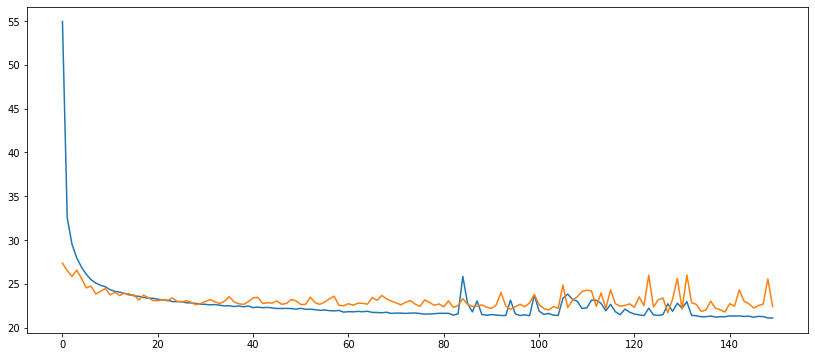

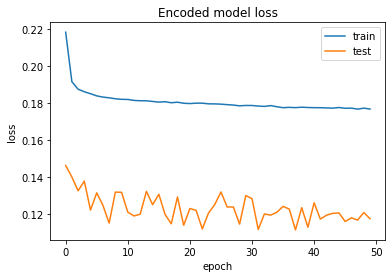

Overall accuracy of Convolutional Neural Network model: 0.9788910423864499


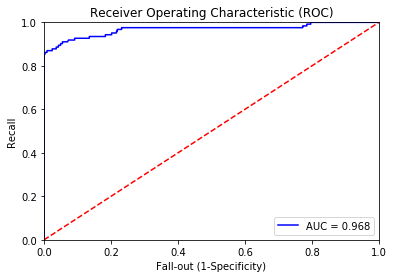

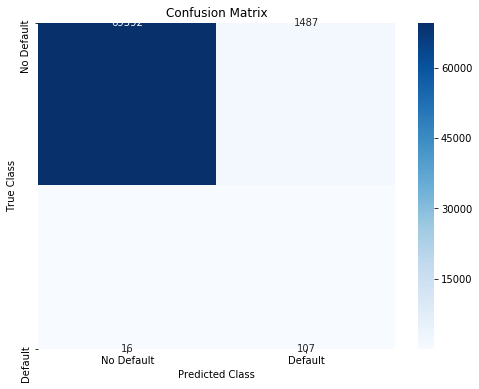

AUC(ROC): 0.9244991574129644
Precision: 0.0671267252195734
Recall: 0.8699186991869918
F1 score: 0.12463599301106582
False positives: 1487
True positives: 107
False negatives: 16
True negatives: 69592
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 27)           837         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 27)           108         dense_19[0][0]                   
_____________________________________________________________________________________

426472/426472 [==============================] - 21s 50us/step - loss: 16.0129 - rec_loss: 25.7301 - kl_loss: 4.6356 - val_loss: 13.8790 - val_rec_loss: 24.0500 - val_kl_loss: 3.0314
Epoch 17/150
426472/426472 [==============================] - 21s 50us/step - loss: 15.7964 - rec_loss: 25.3368 - kl_loss: 4.6302 - val_loss: 13.8795 - val_rec_loss: 24.1110 - val_kl_loss: 2.9768
Epoch 18/150
426472/426472 [==============================] - 21s 50us/step - loss: 15.5957 - rec_loss: 24.9509 - kl_loss: 4.6357 - val_loss: 13.6949 - val_rec_loss: 23.8462 - val_kl_loss: 2.8971
Epoch 19/150
426472/426472 [==============================] - 21s 50us/step - loss: 15.5978 - rec_loss: 24.9819 - kl_loss: 4.6273 - val_loss: 13.5978 - val_rec_loss: 23.4992 - val_kl_loss: 3.0633
Epoch 20/150
426472/426472 [==============================] - 21s 50us/step - loss: 15.4347 - rec_loss: 24.6937 - kl_loss: 4.6153 - val_loss: 13.5618 - val_rec_loss: 23.5008 - val_kl_loss: 2.9602
Epoch 21/150
426472/426472 [=====

Epoch 58/150
426472/426472 [==============================] - 23s 53us/step - loss: 14.6485 - rec_loss: 23.4784 - kl_loss: 4.5612 - val_loss: 12.9719 - val_rec_loss: 22.7062 - val_kl_loss: 2.7365
Epoch 59/150
426472/426472 [==============================] - 22s 53us/step - loss: 14.3593 - rec_loss: 22.9695 - kl_loss: 4.5313 - val_loss: 13.0337 - val_rec_loss: 22.8325 - val_kl_loss: 2.7166
Epoch 60/150
426472/426472 [==============================] - 22s 52us/step - loss: 14.2411 - rec_loss: 22.7555 - kl_loss: 4.5207 - val_loss: 12.9421 - val_rec_loss: 22.5288 - val_kl_loss: 2.8556
Epoch 61/150
426472/426472 [==============================] - 22s 52us/step - loss: 15.7982 - rec_loss: 25.7425 - kl_loss: 4.5844 - val_loss: 14.1656 - val_rec_loss: 24.7651 - val_kl_loss: 2.9099
Epoch 62/150
426472/426472 [==============================] - 22s 52us/step - loss: 15.2031 - rec_loss: 24.5321 - kl_loss: 4.5753 - val_loss: 13.0779 - val_rec_loss: 22.8096 - val_kl_loss: 2.8317
Epoch 63/150
426472/

Epoch 100/150
426472/426472 [==============================] - 23s 54us/step - loss: 14.4467 - rec_loss: 23.1134 - kl_loss: 4.5592 - val_loss: 13.1511 - val_rec_loss: 22.9410 - val_kl_loss: 2.7970
Epoch 101/150
426472/426472 [==============================] - 24s 55us/step - loss: 14.3026 - rec_loss: 22.8416 - kl_loss: 4.5602 - val_loss: 12.9643 - val_rec_loss: 22.4974 - val_kl_loss: 2.8586
Epoch 102/150
426472/426472 [==============================] - 22s 52us/step - loss: 14.2883 - rec_loss: 22.8404 - kl_loss: 4.5461 - val_loss: 13.0710 - val_rec_loss: 22.7509 - val_kl_loss: 2.8211
Epoch 103/150
426472/426472 [==============================] - 22s 52us/step - loss: 14.3282 - rec_loss: 22.9183 - kl_loss: 4.5437 - val_loss: 12.9155 - val_rec_loss: 22.4910 - val_kl_loss: 2.7566
Epoch 104/150
426472/426472 [==============================] - 22s 52us/step - loss: 14.5309 - rec_loss: 23.3062 - kl_loss: 4.5487 - val_loss: 13.0038 - val_rec_loss: 22.6498 - val_kl_loss: 2.7924
Epoch 105/150
4

426472/426472 [==============================] - 22s 52us/step - loss: 17.3602 - rec_loss: 28.2332 - kl_loss: 4.7701 - val_loss: 15.2070 - val_rec_loss: 26.8486 - val_kl_loss: 2.6250
Epoch 142/150
426472/426472 [==============================] - 22s 51us/step - loss: 16.9416 - rec_loss: 27.3757 - kl_loss: 4.7432 - val_loss: 15.0419 - val_rec_loss: 25.9189 - val_kl_loss: 3.1912
Epoch 143/150
426472/426472 [==============================] - 22s 52us/step - loss: 17.8456 - rec_loss: 29.1241 - kl_loss: 4.7521 - val_loss: 14.8617 - val_rec_loss: 25.8198 - val_kl_loss: 2.8624
Epoch 144/150
426472/426472 [==============================] - 22s 52us/step - loss: 17.5375 - rec_loss: 28.4447 - kl_loss: 4.7205 - val_loss: 14.0637 - val_rec_loss: 24.0544 - val_kl_loss: 2.9366
Epoch 145/150
426472/426472 [==============================] - 22s 51us/step - loss: 18.3119 - rec_loss: 29.8252 - kl_loss: 4.7365 - val_loss: 14.7618 - val_rec_loss: 25.0432 - val_kl_loss: 3.2858
Epoch 146/150
426472/426472 [

Epoch 42/50
426472/426472 [==============================] - 87s 203us/step - loss: 0.1909 - accuracy: 0.9260 - val_loss: 0.1384 - val_accuracy: 0.9645
Epoch 43/50
426472/426472 [==============================] - 88s 206us/step - loss: 0.1912 - accuracy: 0.9258 - val_loss: 0.1288 - val_accuracy: 0.9622
Epoch 44/50
426472/426472 [==============================] - 87s 205us/step - loss: 0.1907 - accuracy: 0.9259 - val_loss: 0.1278 - val_accuracy: 0.9764
Epoch 45/50
426472/426472 [==============================] - 87s 204us/step - loss: 0.1911 - accuracy: 0.9258 - val_loss: 0.1470 - val_accuracy: 0.9650
Epoch 46/50
426472/426472 [==============================] - 87s 205us/step - loss: 0.1908 - accuracy: 0.9260 - val_loss: 0.1321 - val_accuracy: 0.9627
Epoch 47/50
426472/426472 [==============================] - 87s 204us/step - loss: 0.1908 - accuracy: 0.9259 - val_loss: 0.1287 - val_accuracy: 0.9639
Epoch 48/50
426472/426472 [==============================] - 87s 204us/step - loss: 0.19

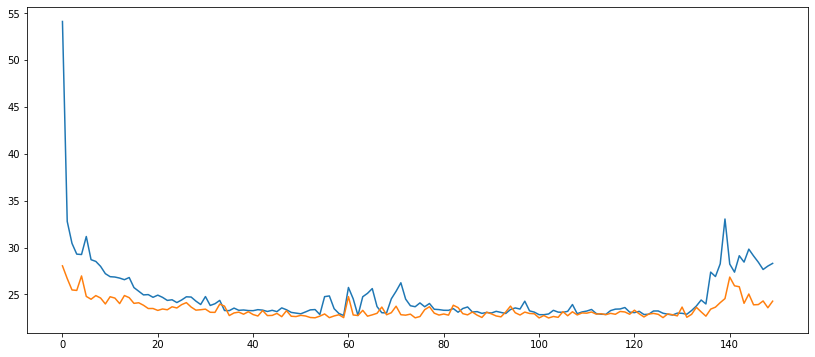

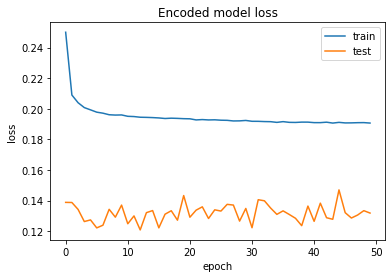

Overall accuracy of Convolutional Neural Network model: 0.9649167158225892


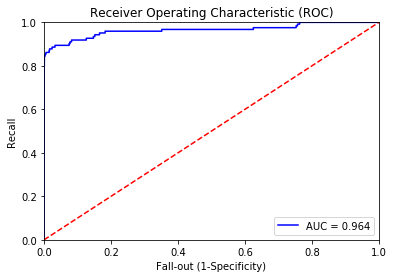

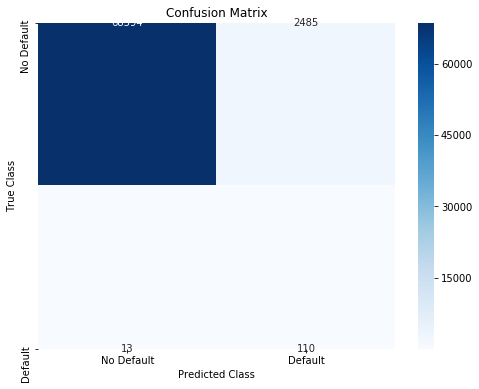

AUC(ROC): 0.9296739217339416
Precision: 0.04238921001926782
Recall: 0.8943089430894309
F1 score: 0.08094186902133922
False positives: 2485
True positives: 110
False negatives: 13
True negatives: 68594
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426474, 30)
After OverSampling, the shape of train_y: (426474,) 

After OverSampling, counts of label '1': 213237
After OverSampling, counts of label '0': 213237
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 27)           837         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_34 (BatchNo (None, 27)           108         dense_28[0][0]                   
_____________________________________________________________________________________

426474/426474 [==============================] - 24s 56us/step - loss: 14.9712 - rec_loss: 24.2432 - kl_loss: 4.3782 - val_loss: 13.8198 - val_rec_loss: 24.3552 - val_kl_loss: 2.7754
Epoch 17/150
426474/426474 [==============================] - 24s 57us/step - loss: 14.8742 - rec_loss: 24.0600 - kl_loss: 4.3865 - val_loss: 13.4723 - val_rec_loss: 23.8641 - val_kl_loss: 2.5953
Epoch 18/150
426474/426474 [==============================] - 24s 56us/step - loss: 14.8423 - rec_loss: 24.0166 - kl_loss: 4.3847 - val_loss: 13.3307 - val_rec_loss: 23.4396 - val_kl_loss: 2.7431
Epoch 19/150
426474/426474 [==============================] - 24s 56us/step - loss: 14.7922 - rec_loss: 23.9157 - kl_loss: 4.3845 - val_loss: 14.0948 - val_rec_loss: 24.9140 - val_kl_loss: 2.7868
Epoch 20/150
426474/426474 [==============================] - 24s 56us/step - loss: 14.7461 - rec_loss: 23.8153 - kl_loss: 4.3977 - val_loss: 13.1907 - val_rec_loss: 23.1987 - val_kl_loss: 2.7056
Epoch 21/150
426474/426474 [=====

Epoch 58/150
426474/426474 [==============================] - 24s 56us/step - loss: 14.0956 - rec_loss: 22.5634 - kl_loss: 4.4740 - val_loss: 13.0259 - val_rec_loss: 22.8495 - val_kl_loss: 2.7299
Epoch 59/150
426474/426474 [==============================] - 24s 56us/step - loss: 14.2494 - rec_loss: 22.8479 - kl_loss: 4.4899 - val_loss: 12.9909 - val_rec_loss: 22.7578 - val_kl_loss: 2.7486
Epoch 60/150
426474/426474 [==============================] - 24s 56us/step - loss: 14.1221 - rec_loss: 22.5907 - kl_loss: 4.4949 - val_loss: 13.1635 - val_rec_loss: 23.0705 - val_kl_loss: 2.7488
Epoch 61/150
426474/426474 [==============================] - 24s 56us/step - loss: 14.0616 - rec_loss: 22.4549 - kl_loss: 4.5031 - val_loss: 12.9772 - val_rec_loss: 22.7683 - val_kl_loss: 2.7105
Epoch 62/150
426474/426474 [==============================] - 24s 56us/step - loss: 14.0928 - rec_loss: 22.5241 - kl_loss: 4.5132 - val_loss: 13.3505 - val_rec_loss: 23.4480 - val_kl_loss: 2.7682
Epoch 63/150
426474/

Epoch 100/150
426474/426474 [==============================] - 24s 57us/step - loss: 13.8173 - rec_loss: 21.9922 - kl_loss: 4.5403 - val_loss: 12.8859 - val_rec_loss: 22.5353 - val_kl_loss: 2.7703
Epoch 101/150
426474/426474 [==============================] - 24s 57us/step - loss: 13.8363 - rec_loss: 22.0357 - kl_loss: 4.5351 - val_loss: 12.9519 - val_rec_loss: 22.5502 - val_kl_loss: 2.8845
Epoch 102/150
426474/426474 [==============================] - 24s 57us/step - loss: 13.8695 - rec_loss: 22.1105 - kl_loss: 4.5316 - val_loss: 13.1529 - val_rec_loss: 23.0098 - val_kl_loss: 2.8152
Epoch 103/150
426474/426474 [==============================] - 24s 57us/step - loss: 13.8699 - rec_loss: 22.0894 - kl_loss: 4.5446 - val_loss: 13.0104 - val_rec_loss: 22.7706 - val_kl_loss: 2.7785
Epoch 104/150
426474/426474 [==============================] - 24s 57us/step - loss: 13.8617 - rec_loss: 22.0849 - kl_loss: 4.5403 - val_loss: 12.9410 - val_rec_loss: 22.6544 - val_kl_loss: 2.7564
Epoch 105/150
4

426474/426474 [==============================] - 24s 56us/step - loss: 13.7100 - rec_loss: 21.7990 - kl_loss: 4.5539 - val_loss: 13.3116 - val_rec_loss: 23.1745 - val_kl_loss: 2.9618
Epoch 142/150
426474/426474 [==============================] - 24s 56us/step - loss: 13.6970 - rec_loss: 21.7891 - kl_loss: 4.5433 - val_loss: 13.0915 - val_rec_loss: 22.8193 - val_kl_loss: 2.8955
Epoch 143/150
426474/426474 [==============================] - 24s 56us/step - loss: 13.6644 - rec_loss: 21.7064 - kl_loss: 4.5675 - val_loss: 13.1678 - val_rec_loss: 23.0509 - val_kl_loss: 2.8207
Epoch 144/150
426474/426474 [==============================] - 24s 56us/step - loss: 13.6708 - rec_loss: 21.7342 - kl_loss: 4.5477 - val_loss: 12.8210 - val_rec_loss: 22.1600 - val_kl_loss: 3.0207
Epoch 145/150
426474/426474 [==============================] - 24s 56us/step - loss: 13.6838 - rec_loss: 21.7559 - kl_loss: 4.5571 - val_loss: 12.9233 - val_rec_loss: 22.4906 - val_kl_loss: 2.8851
Epoch 146/150
426474/426474 [

Epoch 42/50
426474/426474 [==============================] - 89s 208us/step - loss: 0.1648 - accuracy: 0.9364 - val_loss: 0.1226 - val_accuracy: 0.9640
Epoch 43/50
426474/426474 [==============================] - 89s 209us/step - loss: 0.1648 - accuracy: 0.9364 - val_loss: 0.1144 - val_accuracy: 0.9690
Epoch 44/50
426474/426474 [==============================] - 88s 207us/step - loss: 0.1647 - accuracy: 0.9363 - val_loss: 0.1175 - val_accuracy: 0.9670
Epoch 45/50
426474/426474 [==============================] - 88s 207us/step - loss: 0.1648 - accuracy: 0.9364 - val_loss: 0.1175 - val_accuracy: 0.9661
Epoch 46/50
426474/426474 [==============================] - 88s 206us/step - loss: 0.1646 - accuracy: 0.9365 - val_loss: 0.1194 - val_accuracy: 0.9653
Epoch 47/50
426474/426474 [==============================] - 88s 207us/step - loss: 0.1646 - accuracy: 0.9365 - val_loss: 0.1228 - val_accuracy: 0.9650
Epoch 48/50
426474/426474 [==============================] - 88s 207us/step - loss: 0.16

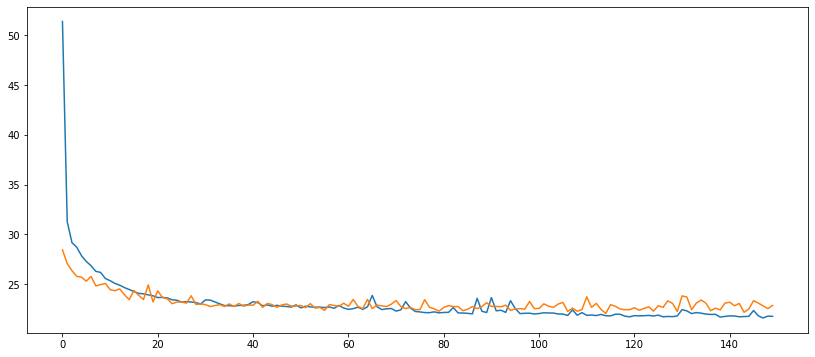

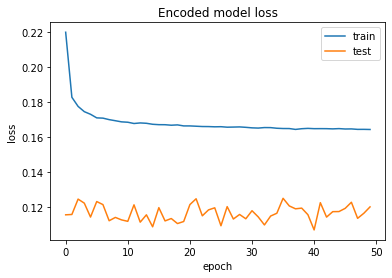

Overall accuracy of Convolutional Neural Network model: 0.9674302327214506


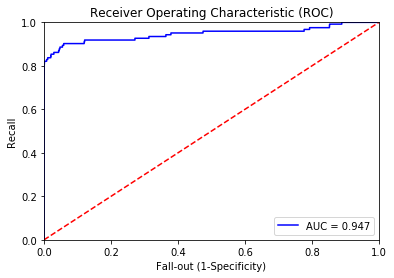

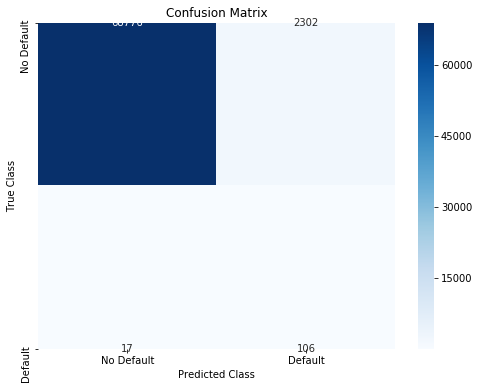

AUC(ROC): 0.9147008313550875
Precision: 0.04401993355481727
Recall: 0.8617886178861789
F1 score: 0.08376135914658236
False positives: 2302
True positives: 106
False negatives: 17
True negatives: 68776


In [6]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 15 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(4, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = SMOTE(random_state=2)
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    

    input_dim = X_res_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(X_res_train, X_res_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(X_res_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train_res, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [7]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = {:0.2f}%".format(Average_precision*100))

print("Average Recall = {:0.2f}%".format(Average_recall*100))

print("Average F1 score = {:0.2f}%".format(Average_f1_score*100))

Average tn = 69089.0
Average fp = 1989.75
Average fn = 15.75
Average tp = 107.25
Average Precision = 5.11%
Average Recall = 87.20%
Average F1 score = 9.66%


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 276356
Total fp: 7959
 Total fn:63
 Total tp:429
Total Precision = 0.05114449213161659
Total Recall = 0.8719512195121951
Total F1_score = 0.09662162162162162
